# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's happening. 

In [7]:
print(cities)

['aflu', 'hilo', 'prince rupert', 'tiksi', 'belushya guba', 'kaitangata', 'ushuaia', 'hami', 'rikitea', 'castro', 'barentsburg', 'dikson', 'carutapera', 'mujiayingzi', 'ketchikan', 'barrow', 'hokitika', 'ponta do sol', 'bredasdorp', 'tuktoyaktuk', 'mar del plata', 'bethel', 'bluff', 'khonuu', 'grand river south east', 'taybad', 'albany', 'ahipara', 'mys shmidta', 'hithadhoo', 'vaini', 'lalmohan', 'tiarei', 'lebu', 'new norfolk', 'tasiilaq', 'williams lake', 'port hedland', 'palafrugell', 'kemijarvi', 'bengkulu', 'pelym', 'atuona', 'abnub', 'illoqqortoormiut', 'itarema', 'east london', 'nanzhou', 'axim', 'mataura', 'kudahuvadhoo', 'darhan', 'airai', 'mehamn', 'jamestown', 'kaohsiung', 'qaanaaq', 'lake city', 'codrington', 'isangel', 'gorontalo', 'mount gambier', 'victoria', 'busselton', 'longyan', 'paamiut', 'hermanus', 'khatanga', 'manicore', 'ribeira grande', 'taolanaro', 'kochevo', 'tsihombe', 'yeppoon', 'haimen', 'thai binh', 'clermont', 'santiago del estero', 'mrirt', 'kalabo', 'ka

### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls. Think: how do you do anything successively?
* Make sure each city in your dataset includes coordinates, country, max temperature, pressure, humidity and wind speed
* Use a try-except to handle errors (they will occur)
* Include a print log of each city as it'sbeing processed (with the city number and city name). City number is just going to count which city is being processed 


In [8]:
city_weather = {'City':[],
                'Cloudiness':[],
                'Country':[],
                'Date':[],
               'Humidity':[],
                'Lat':[],
                'Lng':[],
                'Max Temp':[],
                "Wind Speed":[]
               }

#loop over cities and add data to dictionary
for number,city in enumerate(cities):
    base_url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&APPID=" + api_key

    try:
        #q represents the city
        req = requests.get(base_url + f'&q={city}')
        
        data = req.json()
        
        #add values to our city_weather dictionary
        city_weather['City'].append(data['name'])
        city_weather['Cloudiness'].append(data['clouds']['all'])
        city_weather['Country'].append(data['sys']['country'])
        city_weather['Date'].append(data['sys']['sunrise'])
        city_weather['Humidity'].append(data['main']['humidity'])
        city_weather['Lat'].append(data['coord']['lat'])
        city_weather['Lng'].append(data['coord']['lon'])
        city_weather['Max Temp'].append(data['main']['temp_max'])
        city_weather['Wind Speed'].append(data['wind']['speed'])
        print(str(number+1)+" processing " + city)
        #note: data['id'] --> api stops working
    except:
        print(city+ " not found")
        pass


aflu not found
2 processing hilo
3 processing prince rupert
4 processing tiksi
belushya guba not found
6 processing kaitangata
7 processing ushuaia
8 processing hami
9 processing rikitea
10 processing castro
barentsburg not found
12 processing dikson
13 processing carutapera
14 processing mujiayingzi
15 processing ketchikan
16 processing barrow
17 processing hokitika
18 processing ponta do sol
19 processing bredasdorp
20 processing tuktoyaktuk
21 processing mar del plata
22 processing bethel
23 processing bluff
khonuu not found
grand river south east not found
26 processing taybad
27 processing albany
28 processing ahipara
mys shmidta not found
30 processing hithadhoo
31 processing vaini
32 processing lalmohan
33 processing tiarei
34 processing lebu
35 processing new norfolk
36 processing tasiilaq
37 processing williams lake
38 processing port hedland
39 processing palafrugell
40 processing kemijarvi
41 processing bengkulu
42 processing pelym
43 processing atuona
44 processing abnub
il

347 processing namibe
348 processing coihaique
349 processing ingham
350 processing segovia
351 processing port blair
352 processing valleyview
353 processing falmouth
354 processing mazagao
355 processing clyde river
356 processing coquimbo
357 processing alice springs
358 processing ussuriysk
359 processing sorland
360 processing arnprior
361 processing sechura
362 processing ailigandi
363 processing bambous virieux
lolua not found
365 processing mount isa
366 processing kato mazarakion
367 processing dombarovskiy
368 processing berdigestyakh
369 processing petropavl
370 processing amalapuram
371 processing pitimbu
372 processing gigmoto
kamenskoye not found
374 processing turkmenabat
375 processing bozoum
376 processing svetlogorsk
377 processing verkhoyansk
378 processing aklavik
379 processing narsaq
380 processing phuket
381 processing port lincoln
382 processing svay rieng
383 processing vostok
384 processing puli
385 processing damghan
386 processing cabedelo
387 processing san

In [15]:
print(city_weather)

{'City': ['Ambilobe', 'Thompson', 'Busselton', 'Souillac', 'Hualmay', 'Kruisfontein', 'Hithadhoo', 'Hay River', 'Ushuaia', 'Tolbazy', 'Mataura', 'Port Hardy', 'Punta Arenas', 'Bluff', 'Berezovyy', 'Villa Carlos Paz', 'Te Anau', 'Castro', 'Port Alfred', 'Longyearbyen', 'Kaitangata', 'Ribeira Grande', 'Bongandanga', 'Hong Kong', 'Pevek', 'Havøysund', 'Forsytheganj', 'North Platte', 'Hofn', 'Rikitea', 'Isangel', 'Saint-Philippe', 'Puerto Ayora', 'Sørland', 'San Cristobal', 'Nikolskoye', 'Atuona', 'Vanavara', 'Saskylakh', 'Lagoa', 'Lander', 'Yulin', 'Ponta do Sol', 'Butaritari', 'Stepnyak', 'São João da Barra', 'Hobart', 'Iqaluit', 'Hermanus', 'Oussouye', 'Qaanaaq', 'Mount Vernon', 'Lebu', 'Provideniya', 'Palmer', 'Hamilton', 'Jiazi', 'Ust-Kuyga', 'Thurles', 'Yumen', 'Hiroshima', 'Pisco', 'Mtwara', 'Chapais', 'New Norfolk', 'Marabu', 'East London', 'Hilo', 'Avarua', 'Luanda', 'Leh', 'Kapaa', 'Yellowknife', 'Saint-Augustin', 'Kavaratti', 'Santa Isabel Rio Negro', 'Amqui', 'Dingle', 'Port El

### Convert Raw Data to DataFrame
* Display the DataFrame
* Export the city data into a .csv. Open it up in excel or another program to make sure it looks as expected

In [9]:
weather_df = pd.DataFrame.from_dict(city_weather)
weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hilo,40,US,1634746598,76,19.7297,-155.0900,74.93,5.75
1,Prince Rupert,40,CA,1634743194,87,54.3161,-130.3201,48.29,11.50
2,Tiksi,100,RU,1634771671,93,71.6872,128.8694,13.89,6.20
3,Kaitangata,31,NZ,1634751301,63,-46.2817,169.8464,49.66,8.08
4,Ushuaia,40,AR,1634807313,46,-54.8000,-68.3000,46.06,10.36
...,...,...,...,...,...,...,...,...,...
556,Sühbaatar,0,MN,1634772393,42,50.2314,106.2078,45.09,7.25
557,Nizwá,63,OM,1634782141,52,22.9333,57.5333,77.95,1.61
558,Brighton,100,GB,1634798010,90,50.8284,-0.1395,50.56,14.00
559,Saryozek,100,KZ,1634778619,25,44.3583,77.9753,58.12,0.94


In [10]:
weather_df.count()

City          561
Cloudiness    561
Country       561
Date          561
Humidity      561
Lat           561
Lng           561
Max Temp      561
Wind Speed    561
dtype: int64

In [11]:
weather_df.to_csv('weather.csv',index=False)

In [12]:
check_df= pd.read_csv('weather.csv')
check_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hilo,40,US,1634746598,76,19.7297,-155.0900,74.93,5.75
1,Prince Rupert,40,CA,1634743194,87,54.3161,-130.3201,48.29,11.50
2,Tiksi,100,RU,1634771671,93,71.6872,128.8694,13.89,6.20
3,Kaitangata,31,NZ,1634751301,63,-46.2817,169.8464,49.66,8.08
4,Ushuaia,40,AR,1634807313,46,-54.8000,-68.3000,46.06,10.36
...,...,...,...,...,...,...,...,...,...
556,Sühbaatar,0,MN,1634772393,42,50.2314,106.2078,45.09,7.25
557,Nizwá,63,OM,1634782141,52,22.9333,57.5333,77.95,1.61
558,Brighton,100,GB,1634798010,90,50.8284,-0.1395,50.56,14.00
559,Saryozek,100,KZ,1634778619,25,44.3583,77.9753,58.12,0.94


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* Save the plotted figures as .pngs and embed those pngs in your readme file.

#### Latitude vs. Temperature Plot

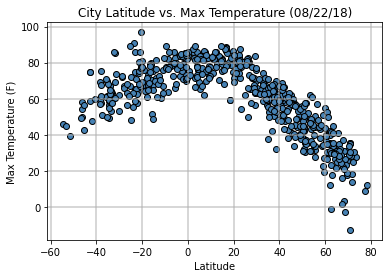

In [13]:
fig,ax = plt.subplots()
ax.scatter(weather_df["Lat"], weather_df["Max Temp"],color = "steelblue", edgecolor = "black")
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.set_title("City Latitude vs. Max Temperature (08/22/18)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.show()
fig.savefig('Lat_Temp.png')

#### Latitude vs. Humidity Plot

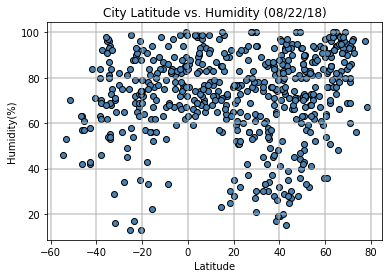

In [14]:
fig,ax = plt.subplots()
ax.scatter(weather_df["Lat"], weather_df["Humidity"],color = "steelblue", edgecolor = "black")
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity(%)")
ax.set_title("City Latitude vs. Humidity (08/22/18)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.show()
fig.savefig('Lat_Humidity.png')

#### Latitude vs. Cloudiness Plot

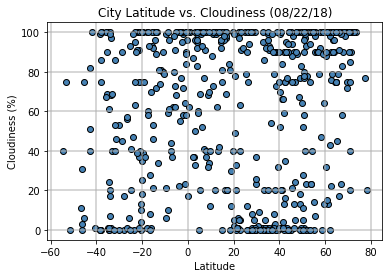

In [15]:
fig,ax = plt.subplots()
ax.scatter(weather_df["Lat"], weather_df["Cloudiness"],color = "steelblue", edgecolor = "black")
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.set_title("City Latitude vs. Cloudiness (08/22/18)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.show()
fig.savefig('Lat_Cloudiness.png')

#### Latitude vs. Wind Speed Plot

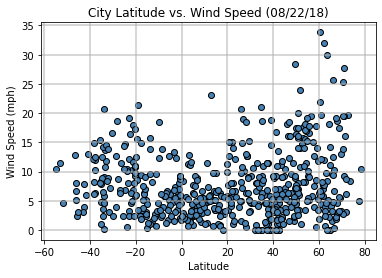

In [16]:
fig,ax = plt.subplots()
ax.scatter(weather_df["Lat"], weather_df["Wind Speed"],color = "steelblue", edgecolor = "black")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
ax.set_title("City Latitude vs. Wind Speed (08/22/18)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.show()
fig.savefig('Lat_Wind Speed.png')

### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

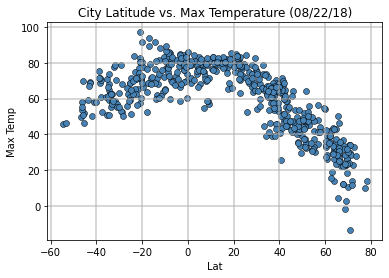

In [58]:
sns.scatterplot(x=weather_df["Lat"], y=weather_df["Max Temp"],color = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.show()

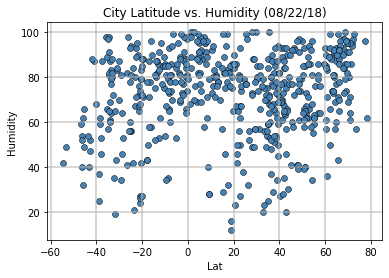

In [59]:
sns.scatterplot(x=weather_df["Lat"], y=weather_df["Humidity"],color = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.show()

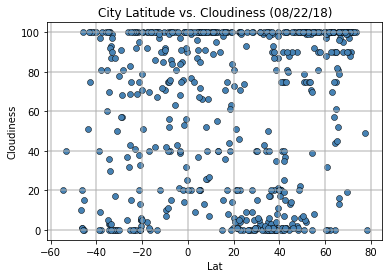

In [60]:
sns.scatterplot(x=weather_df["Lat"], y=weather_df["Cloudiness"],color = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.show()

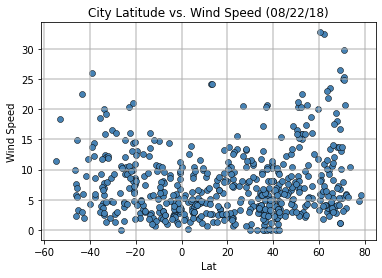

In [61]:
sns.scatterplot(x=weather_df["Lat"], y=weather_df["Wind Speed"],color = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.show()

### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

- The cities near the equator have the highest temperture while cities farthest from the equator have the lowest temperature. The temperature decreases depending on how much farther the cities are from the equator.
- Most of cities' wind speed are in the lower range such as 0-10 mph. Some of the cities as it gets closer to the north pole, the wind speed increases as well
- Most of cities have high humidity level of 80 to 100%

### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 

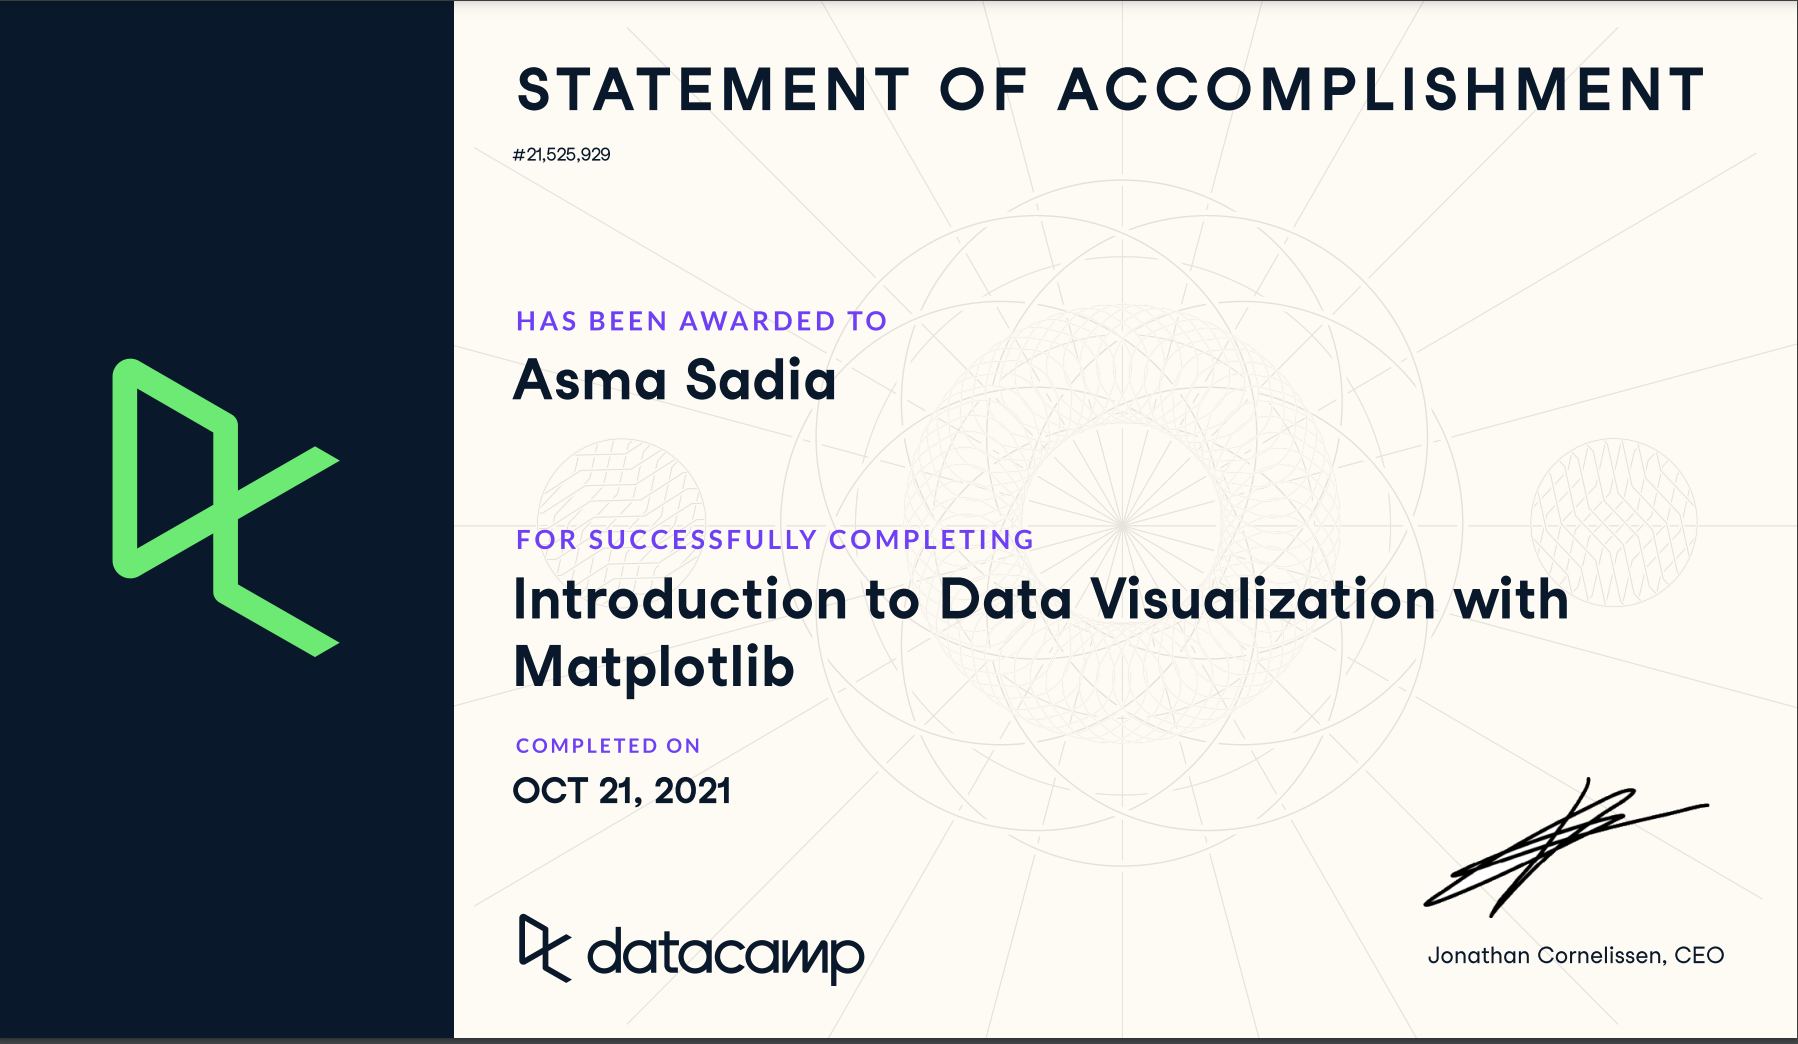

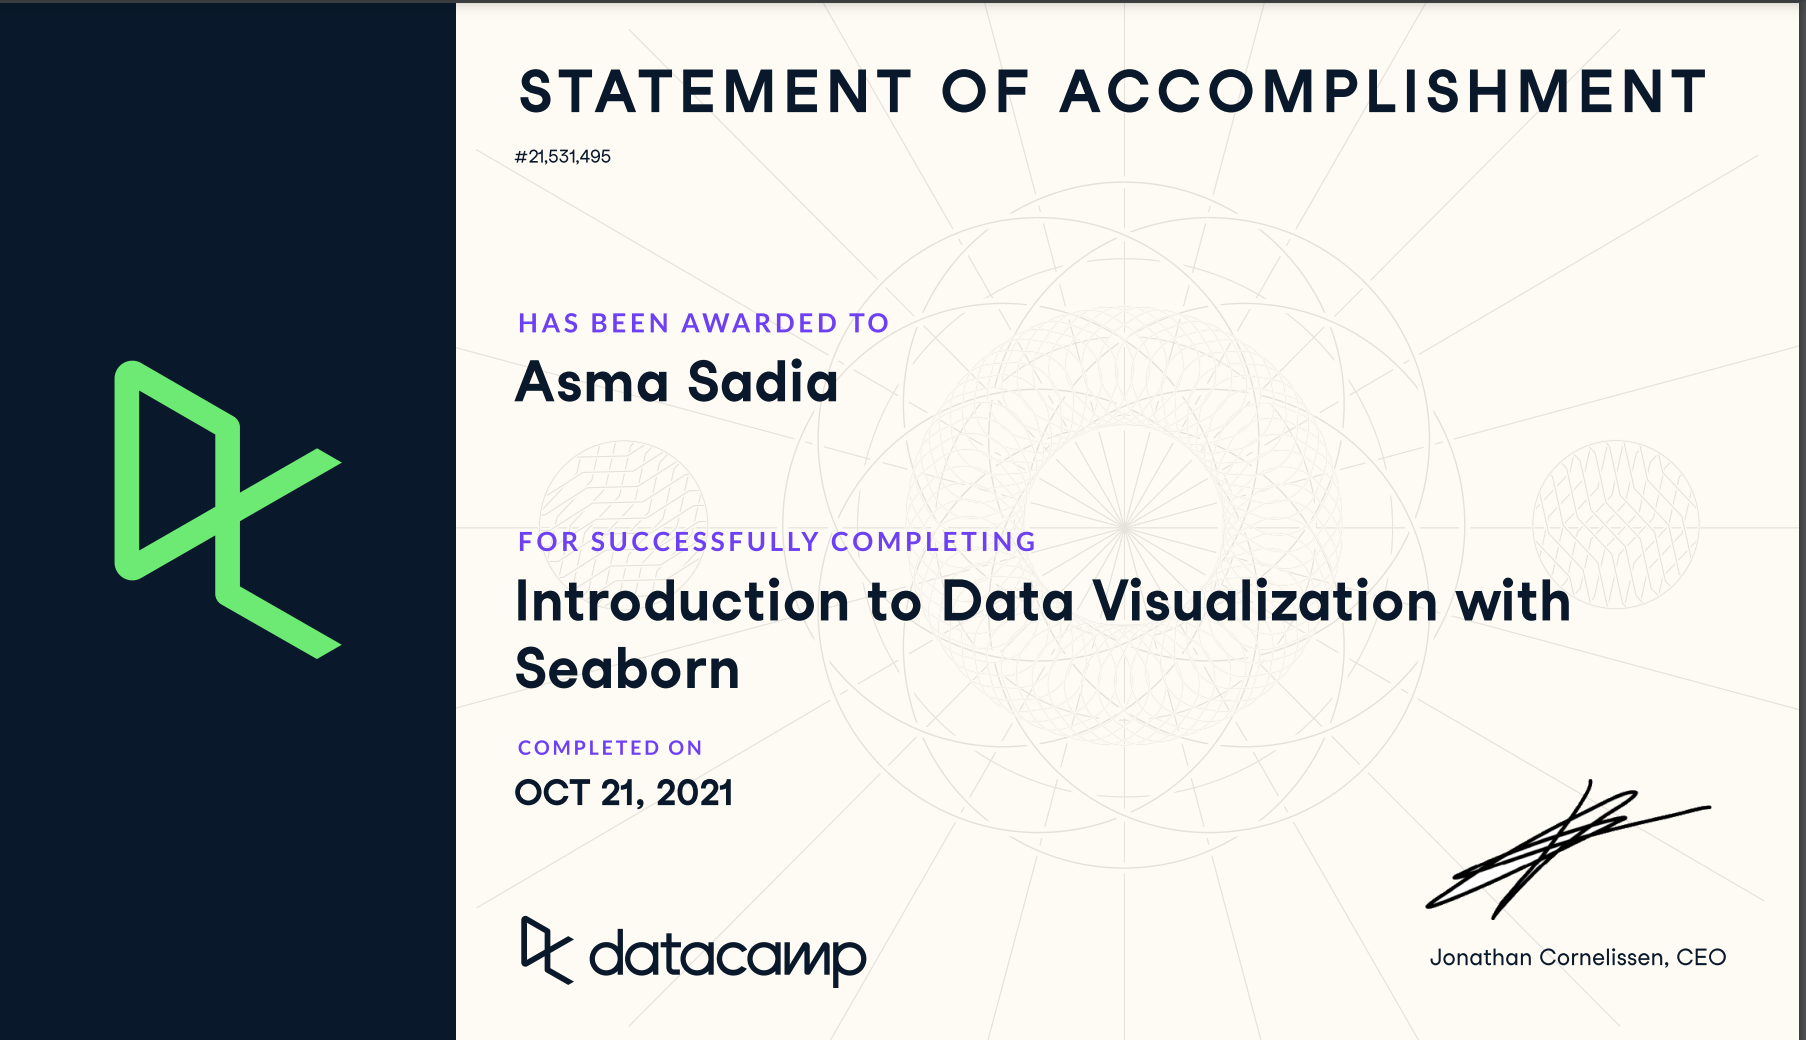